# 20. knn 분류

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris, load_wine, load_breast_cancer

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC #SVM
from sklearn.compose import make_column_transformer,ColumnTransformer

import math

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


In [2]:
x_data, y_data = mglearn.datasets.make_forge()

In [3]:
x_data

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [4]:
y_data

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data ,y_data, test_size = 0.2, stratify = y_data)

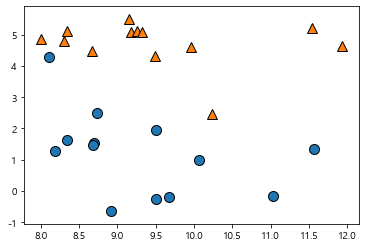

In [6]:
mglearn.discrete_scatter( x_data[:,0], x_data[:, 1], y_data)
plt.show()


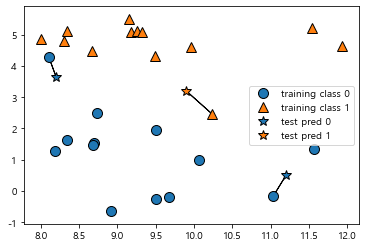

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

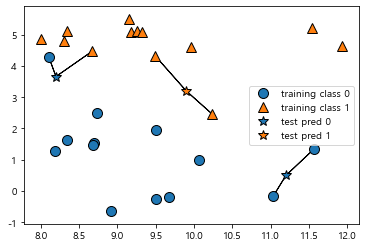

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

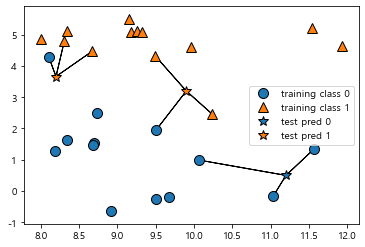

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
model_knn.predict(x_test)

array([1., 0., 0., 1., 0., 1.])

In [12]:
y_test

array([1, 0, 0, 1, 0, 1])

In [13]:
model_knn.score(x_test, y_test)

1.0

In [14]:
model_knn.predict([[9.5, 1]])

array([0.])

In [15]:
model_knn.predict([[9.5, 4.5]])

array([1.])

In [16]:
param_value = {'n_neighbors' : [1, 2, 3, 4, 5]}
gridSearch = GridSearchCV(KNeighborsRegressor(), param_grid = param_value)
gridSearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [17]:
gridSearch.best_params_

{'n_neighbors': 1}

In [18]:
gridSearch.best_estimator_.predict(x_test)

array([1., 0., 0., 1., 0., 1.])

## iris 데이터 셋을 KNN을 이용하여 분류하시오
4.6, 3.1, 1.5, 0.2 에 대한 분류

In [19]:
iris = load_iris()

In [20]:
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
target = pd.DataFrame(iris['target'])
target.columns = ['target']
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [22]:
x_train, x_test, y_train, y_test = train_test_split(iris_df, target, test_size = 0.2, stratify = target, random_state = 1)

In [23]:
param_value = {'n_neighbors' : [1, 2, 3, 4, 5]}
gridSearch = GridSearchCV(KNeighborsRegressor(), param_grid = param_value)
gridSearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [24]:
gridSearch.best_estimator_.predict([[4.6, 3.1, 1.5, 0.2]])

array([[0.]])

In [25]:
gridSearch.best_score_

0.9634003061952209

In [26]:
gridSearch.score(x_test, y_test)

0.95

# 21. 결정트리(decision tree)

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

## 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
<br>

### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>


In [28]:
iris = load_iris()

In [29]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris['feature_names']
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
x_data = iris['data']
y_data = iris['target']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

In [32]:
model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'

In [36]:
export_graphviz(model_tree, out_file = 'tree.dot', class_names = iris['target_names'], feature_names = iris['feature_names'])

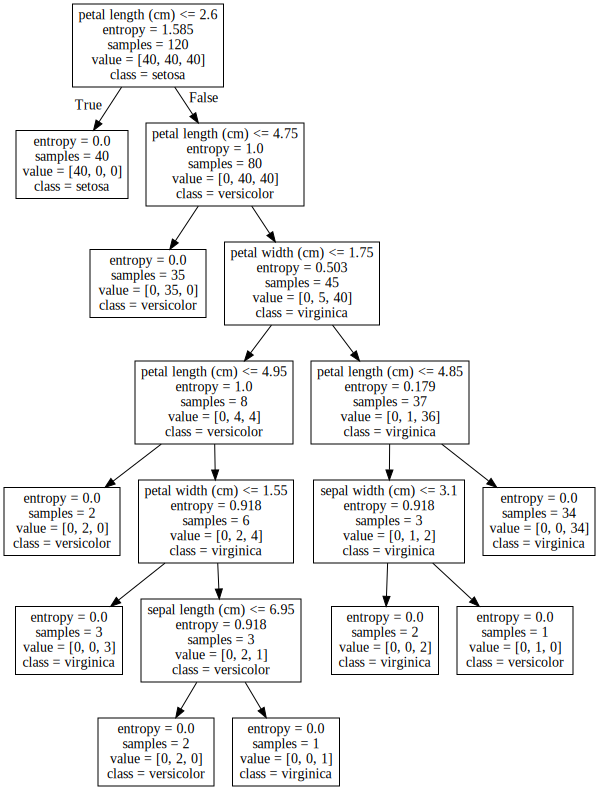

In [37]:
fp = open('tree.dot')
dot_graph = fp.read()
graphviz.Source(dot_graph)

In [38]:
model_tree.feature_importances_

array([0.0144845 , 0.0144845 , 0.9144101 , 0.05662089])

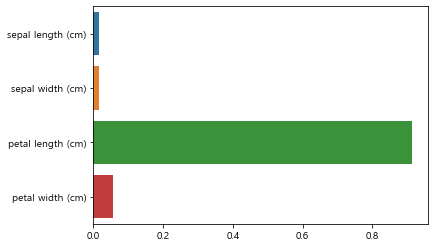

In [39]:
sns.barplot(x = model_tree.feature_importances_, y = iris['feature_names'])
plt.show()

## 과적합 확인

In [40]:
from sklearn.model_selection import validation_curve

In [41]:
pipe_tree = make_pipeline(DecisionTreeClassifier(criterion = 'entropy'))

In [42]:
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
train_score, test_score = validation_curve(estimator = pipe_tree, X = x_train, y = y_train, param_name = 'decisiontreeclassifier__max_depth', 
                                            param_range = param_range, scoring = 'f1_macro', cv = 5, verbose = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [44]:
train_score.mean(axis = 1)

array([0.96451346, 0.97077722, 0.98958181, 0.99791616, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [45]:
test_score.mean(axis = 1)

array([0.93300342, 0.94143791, 0.94993464, 0.94993464, 0.94993464,
       0.94156863, 0.94993464, 0.94993464, 0.94993464])

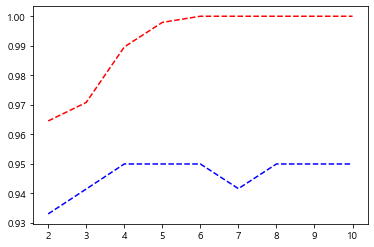

In [46]:
plt.plot(param_range, train_score.mean(axis = 1), 'r--')
plt.plot(param_range, test_score.mean(axis = 1), 'b--')
plt.show()

In [47]:
cancer = load_breast_cancer()

x_data = pd.DataFrame(cancer['data'])
x_data.columns = cancer['feature_names']

y_data = pd.DataFrame(cancer['target'], columns = ['target'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

In [48]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## BREATE_CANCER DECISIONTREE VALIDATION CURVE 그리시오

In [49]:
x_data = pd.DataFrame(cancer['data'])
x_data.columns = cancer['feature_names']
x_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [50]:
y_data = pd.DataFrame(cancer['target'], columns = ['target'])
y_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

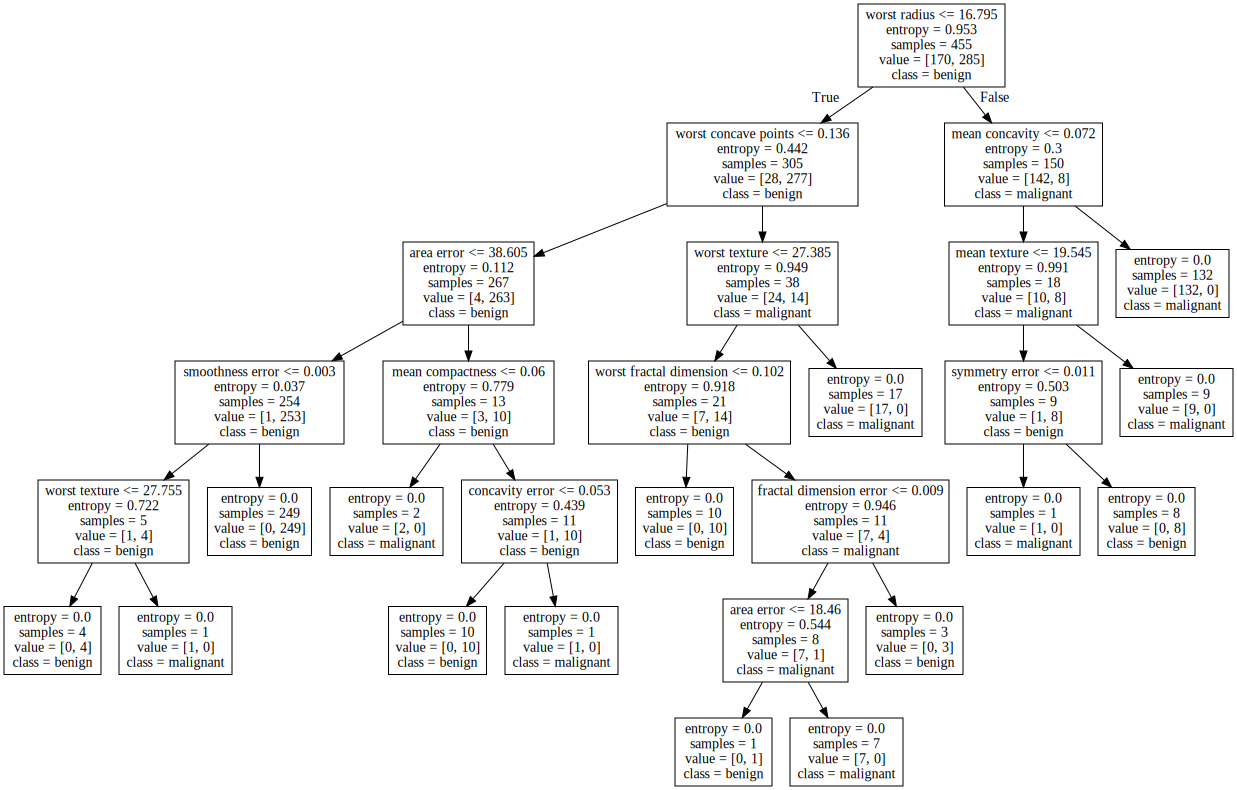

In [52]:
# decision tree

model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree.fit(x_train, y_train)

import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'

export_graphviz(model_tree, out_file = 'tree.dot', class_names = cancer['target_names'], feature_names = cancer['feature_names'])

fp = open('tree.dot')
dot_graph = fp.read()
graphviz.Source(dot_graph)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


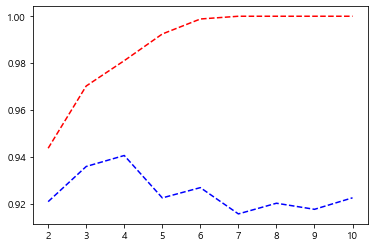

In [53]:
# validation score
from sklearn.model_selection import validation_curve

pipe_tree = make_pipeline(DecisionTreeClassifier(criterion = 'entropy'))

param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

train_score, test_score = validation_curve(estimator = pipe_tree, X = x_train, y = y_train, param_name = 'decisiontreeclassifier__max_depth', 
                                            param_range = param_range, scoring = 'f1_macro', cv = 5, verbose = 1)

plt.plot(param_range, train_score.mean(axis = 1), 'r--')                                  
plt.plot(param_range, test_score.mean(axis = 1), 'b--')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


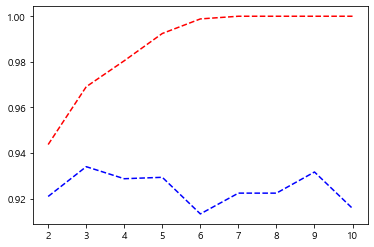

In [54]:
# data load
cancer = load_breast_cancer()

x_data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

y_data = pd.DataFrame(cancer['target'], columns = ['target'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, random_state = 1)

# decision tree

model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree.fit(x_train, y_train)

import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'

export_graphviz(model_tree, out_file = 'tree.dot', class_names = cancer['target_names'], feature_names = cancer['feature_names'])

fp = open('tree.dot')
dot_graph = fp.read()
graphviz.Source(dot_graph)

# validation curve
from sklearn.model_selection import validation_curve

pipe_tree = make_pipeline(DecisionTreeClassifier(criterion = 'entropy'))

param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

train_score, test_score = validation_curve(estimator = pipe_tree, X = x_train, y = y_train, param_name = 'decisiontreeclassifier__max_depth', 
                                            param_range = param_range, scoring = 'f1_macro', cv = 5, verbose = 1)

plt.plot(param_range, train_score.mean(axis = 1), 'r--')                                  
plt.plot(param_range, test_score.mean(axis = 1), 'b--')
plt.show()

# 22. 나이브 베이즈

## 나이브 베이스 분류기(Naive Bayes Classification)

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기
  * 다항 나이브 베이즈 분류기


## 나이브 베이즈 분류기의 확률 모델

* 나이브 베이즈는 조건부 확률 모델
* *N*개의 특성을 나타내는 벡터 **x**를 입력 받아 k개의 가능한 확률적 결과를 출력

$$ \begin{equation}
p(C_k | x_1,...,x_n)
\end{equation} $$

* 위의 식에 베이즈 정리를 적용하면 다음과 같음

$$ \begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation} $$

* 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

$$ \begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation} $$

* 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음

$$ \begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation} $$

* 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음

$$ \begin{equation} 
\begin{split} 
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\ & \propto p(C_k) 
\end{split}
\end{equation} $$

- 정수형 또는 실수형: GaussianNB (1, 3, 2), (0.1, 0.9, 1.5)
- 정수형: MultinomialNB (1, 3, 2)
- 바이너리형: BernoulliNB (0,1,0)
- alpha : smoothing

In [55]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [56]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [57]:
df = pd.DataFrame( [weather,temp])
df = df.T
df.columns = ['날씨', '온도']
df['외출여부'] = play
df


,날씨,온도,외출여부
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [58]:
x_data = df.iloc[: , : -1]
y_data = df.iloc[: , -1]

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

In [60]:
ct = make_column_transformer((OneHotEncoder(), ['날씨', '온도']), remainder = 'passthrough')

In [61]:
model_pipe = make_pipeline( ct, BernoulliNB() )
model_pipe.fit(x_data, y_data)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['날씨', '온도'])])),
                ('bernoullinb', BernoulliNB())])

In [62]:
testdf = pd.DataFrame( [['Sunny', 'Hot']], columns = ['날씨', '온도'])

In [63]:
model_pipe.predict( pd.DataFrame( [['Sunny', 'Hot']], columns = ['날씨', '온도']))

array(['No'], dtype='<U3')

## 토마토, 6, 4 분류

In [64]:
food = pd.read_excel('음식.xlsx')
food = pd.DataFrame(food)
food

,이름,당도,아삭함,종류
0,사과,10,9,과일
1,베이컨,1,4,단백질
2,바나나,10,1,과일
3,당근,5,10,채소
4,샐러리,3,10,채소
5,치즈,1,1,단백질
6,오이,2,8,채소
7,생선,3,1,단백질
8,포도,8,5,과일
9,콩,3,7,채소


In [65]:
x_data = food.iloc[: , : -1].drop('이름', axis = 1)
y_data = food.iloc[: , -1]

In [66]:
ct = OneHotEncoder()
ct.fit([y_data])

OneHotEncoder()

In [67]:
ct.transform([y_data])

<1x15 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [68]:
model_pipe = MultinomialNB()
model_pipe.fit(x_data, y_data)

MultinomialNB()

In [69]:
model_pipe.predict([[6, 4]])

array(['과일'], dtype='<U3')

# 23. SVM

In [70]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing


from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC #SVM
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
wine = load_wine()
x_data = wine['data']
y_data = wine['target']
X_train, X_test, y_train, y_test = train_test_split( x_data, 
                           y_data,  test_size=0.2,  stratify=y_data, random_state = 1)


In [72]:
model_wine = make_pipeline(StandardScaler(), SVC())
model_wine.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [73]:
model_wine.score(X_train, y_train)

1.0

In [74]:
model_wine.score(X_test, y_test)

1.0

## kernel 활용

In [75]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
print(len(df))
df.head(3)


768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [76]:
x_data = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']]
y_data = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size=0.25, stratify=y_data)


In [77]:
model = make_pipeline(StandardScaler(), SVC())
param_value = {'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                'svc__C' : range(1, 11), 'svc__gamma' : ['scale', 'auto']}

gridS = GridSearchCV(model, param_grid = param_value, scoring = 'f1', verbose = 1)
gridS.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': range(1, 11),
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='f1', verbose=1)

In [78]:
gridS.best_params_

{'svc__C': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [79]:
gridS.best_score_

0.6280413732904799

In [80]:
gridS.best_estimator_.score(x_test, y_test)

0.765625

In [81]:
gridS.best_estimator_.score(x_train, y_train)

0.8333333333333334

현대 자동차 데이터를 이용

가격:1135 

년식:2015

연비: 15

마력:100

토크:13.6

연료:가솔린

하이브리드:0

배기량:1368

중량:1035

변속기:수동

인경우 종류( 준중형, 소형, 대형) 를 예측하시요.

 KNN, decision tree, naive_bayes, svc 각각의 모델에 대해 

1. f1 score(train, test) , confusion matrix 를 구하시요

2. 각모델별 train ,test f1 를  bar 그래프로 그리고 가장높은 f1 score 의 모델을 확인하시요.


In [82]:
hd_df = pd.read_excel('data4/hyundaiCar.xlsx')

x_data = hd_df.drop('종류', axis = 1)
y_data = hd_df[['종류']]

In [83]:
x_data

,가격,년식,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,17.7,156,19.3,가솔린,1,1999,1585,자동


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, stratify=y_data)

In [85]:
ct = make_column_transformer((OneHotEncoder(), ['연료', '변속기']), remainder = 'passthrough')
model_knn = make_pipeline( ct, StandardScaler(), KNeighborsClassifier(n_neighbors = 2) )
model_knn.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [86]:
a = [1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']
a = pd.DataFrame(a).T
a.columns = x_data.columns

In [87]:
model_knn.predict(a)

array(['소형'], dtype=object)

In [88]:
print('KNN train f1 score : ', metrics.f1_score(y_train, model_knn.predict(x_train), average='macro'))
print('KNN test f1 score : ', metrics.f1_score(y_test, model_knn.predict(x_test), average='macro'))

KNN train f1 score :  0.7533333333333333
KNN test f1 score :  0.8


In [89]:
y_predict = model_knn.predict(x_test)

In [90]:
# confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[7, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 2, 2, 0],
       [1, 0, 0, 2]], dtype=int64)

knn 예측 : ['소형'] 

KNN train f1 score :  0.7597222222222222
KNN test f1 score :  0.7281746031746031


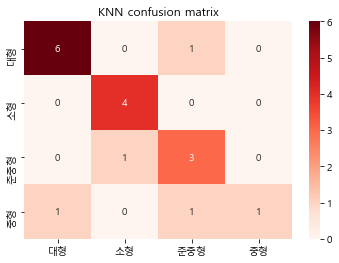

In [91]:
#### knn
## data load
hd_df = pd.read_excel('data4/hyundaiCar.xlsx')

x_data = hd_df.drop('종류', axis = 1)
y_data = hd_df[['종류']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, stratify=y_data)

## modeling
ct = make_column_transformer((OneHotEncoder(), ['연료', '변속기']), remainder = 'passthrough')
model_knn = make_pipeline( ct, StandardScaler(), KNeighborsClassifier(n_neighbors = 2) )
model_knn.fit(x_train, y_train)

## predict
a = [1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']
a = pd.DataFrame(a).T
a.columns = x_data.columns

print('knn 예측 :', model_knn.predict(a), '\n')

# f1 score
print('KNN train f1 score : ', metrics.f1_score(y_train, model_knn.predict(x_train), average='macro'))
print('KNN test f1 score : ', metrics.f1_score(y_test, model_knn.predict(x_test), average='macro'))

# confusion matrix
y_predict = model_knn.predict(x_test)
cm_knn = confusion_matrix(y_test, y_predict)
import seaborn as sns
sns.heatmap(cm_knn, annot=True, cmap='Reds', yticklabels=['대형', '소형', '준중형', '중형'], 
            xticklabels=['대형', '소형', '준중형', '중형'])
plt.title('KNN confusion matrix')
plt.show()


In [92]:
# f1 bar chart(train)
plt.bar(['KNN', 'DT', 'NB', 'SVC'], [metrics.f1_score(y_train, model_knn.predict(x_train), average='macro'), metrics.f1_score(y_train, model_dt.predict(x_train), average='macro'), metrics.f1_score(y_train, model_nb.predict(x_train), average='macro'), metrics.f1_score(y_train, model_svc.predict(x_train), average='macro')])
plt.show()

# f1 bar chart(test)
plt.bar(['KNN', 'DT', 'NB', 'SVC'], [metrics.f1_score(y_test, model_knn.predict(x_test), average='macro'), metrics.f1_score(y_test, model_dt.predict(x_test), average='macro'), metrics.f1_score(y_test, model_nb.predict(x_test), average='macro'), metrics.f1_score(y_test, model_svc.predict(x_test), average='macro')])
plt.show()

NameError: name 'model_dt' is not defined